<a href="https://colab.research.google.com/github/audrey-fontana/analise_filmes_terror/blob/main/analise_filmes_terror.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Filmes de Terror

### Importando bibliotecas e lendo o data set

In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Para ler os arquivos direto do drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O data set utilizado nessa análise foi extraído do Kaggle, nesse [link](https://www.kaggle.com/datasets/evangower/horror-movies?resource=download )

In [ ]:
#Lendo o data set
terror = pd.read_csv("/content/drive/MyDrive/Educação/DNC - Aulas/Datasets/horror_movies.csv")

###Limpeza dos dados

In [ ]:
#Visualizando as primeiras linhas
terror.head()

,Unnamed: 0,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,...,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,1,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,...,6.9,0.0,9572765.0,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,2,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,...,7.1,0.0,56000000.0,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,3,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,...,6.8,17000000.0,45000000.0,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,4,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,...,7.9,18800000.0,161000000.0,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,5,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,...,7.0,0.0,0.0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


In [ ]:
#Verificando o tipo dos dados
terror.dtypes

,0
Unnamed: 0,int64
id,int64
original_title,object
title,object
original_language,object
overview,object
tagline,object
release_date,object
poster_path,object
popularity,float64


In [ ]:
#Removendo a coluna "Unnamed: 0"; dado redundante
terror.drop(columns="Unnamed: 0", inplace=True)

#Removendo colunas 'collection' e 'collection_name'; não serão relevantes
terror.drop(columns=['collection', 'collection_name'], inplace=True)

In [ ]:
#Alterando o tipo de dados para otimizar memória e armazenamento

#Definir a lista de colunas a serem convertidas de objeto para string
colunas_para_converter = [
    'original_title',
    'title',
    'original_language',
    'overview',
    'tagline',
    'poster_path',
    'backdrop_path'
]

#Criar um dicionário de mapeamento
#Mapeamento de cada coluna na lista para o novo tipo 'string'
conversao_dtype = {col: 'string' for col in colunas_para_converter}

#Aplicar a conversão
terror = terror.astype(conversao_dtype)

#Alterando a coluna de 'release_date' para datetime; por se tratar de uma data
terror['release_date'] = pd.to_datetime(terror['release_date'], errors='coerce')

#Alterando a coluna 'status' para category; por se ter baixa cardinalidade
terror['status'] = terror['status'].astype('category')

#Verificando a alteração
terror.dtypes

,0
id,int64
original_title,string[python]
title,string[python]
original_language,string[python]
overview,string[python]
tagline,string[python]
release_date,datetime64[ns]
poster_path,string[python]
popularity,float64
vote_count,int64


In [ ]:
#Substituir os valores 0 por NaN nas coluns "budget", "revenue" e "runtime"; por se tratarem de features numéricas

colunas_para_limpeza = ['budget', 'revenue', 'runtime']
terror[colunas_para_limpeza] = terror[colunas_para_limpeza].replace(0, np.nan)

In [ ]:
#Preencher os NaNs das colunas "tagline", "overview", "poster_path", "backdrop_path" com 'N/A' para evitar erros em análises de texto ou contagem de presença/ausência
colunas_para_limpeza = ['tagline', 'overview', 'poster_path', 'backdrop_path']
terror[colunas_para_limpeza] = terror[colunas_para_limpeza].fillna("N/A")

In [ ]:
#Verificando os valores nulos
valores_nulos = terror.isnull().sum()
print("Contagem de Valores Nulos (NaN) por Coluna:")
print(valores_nulos)

Contagem de Valores Nulos (NaN) por Coluna:
id                       0
original_title           0
title                    0
original_language        0
overview                 0
tagline                  0
release_date             0
poster_path              0
popularity               0
vote_count               0
vote_average             0
budget               27339
revenue              30964
runtime               2668
status                   0
adult                    0
backdrop_path            0
genre_names              0
dtype: int64


In [ ]:
#Tokenização dos valores na coluna "genre_names" para avaliação de gêneros e subgêneros
coluna_genero = 'genre_names'

# Tokenizar a string de gêneros em uma lista de strings.
# O método .str.split(', ') divide a string a cada ocorrência de ", " (vírgula e espaço).
terror[coluna_genero] = terror[coluna_genero].str.split(', ')

In [ ]:
terror.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,NaN,9572765.0,99.0,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"[Horror, Thriller]"
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,NaN,56000000.0,93.0,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"[Adventure, Drama, Horror]"
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000.0,45000000.0,115.0,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"[Horror, Mystery, Thriller]"
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000.0,161000000.0,103.0,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"[Horror, Thriller]"
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,N/A,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,NaN,NaN,NaN,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,[Horror]


###Análise Exploratória (EDA)

####Verificando a popularidade de crítica

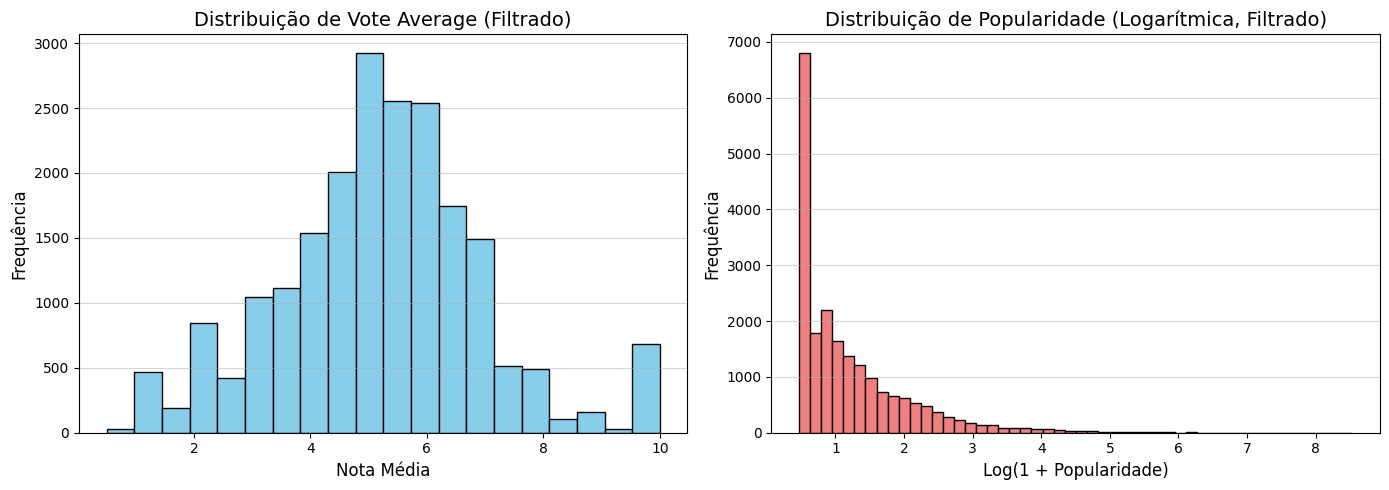

In [ ]:
#Distribuição de avaliações: histograma de "vote_average" e "popularity"

#Fazendo um filtro para remover os valores iguais a zero
df_filtrado = terror[(terror['vote_average'] > 0) & (terror['popularity'] > 0)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#vote_average (FILTRADO)
axes[0].hist(df_filtrado['vote_average'], bins=20, edgecolor='black', color='skyblue')
axes[0].set_title('Distribuição de Vote Average (Filtrado)', fontsize=14)
axes[0].set_xlabel('Nota Média', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].grid(axis='y', alpha=0.5)

#popularity (FILTRADO)
#Usamos np.log1p para lidar com o forte enviesamento da popularidade
axes[1].hist(np.log1p(df_filtrado['popularity']), bins=50, edgecolor='black', color='lightcoral')
axes[1].set_title('Distribuição de Popularidade (Logarítmica, Filtrado)', fontsize=14)
axes[1].set_xlabel('Log(1 + Popularidade)', fontsize=12)
axes[1].set_ylabel('Frequência', fontsize=12)
axes[1].grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.savefig('vote_average_popularity_histograms_filtrados.png')


In [ ]:
#Top filmes mais bem avaliados

#Colunas de interesse
colunas_chave = ['title', 'vote_count', 'vote_average']

#Calcular o Limiar de Votos (Threshold)
#Usamos o 75º percentil do 'vote_count'. Isso garante que o filme tenha mais votos do que pelo menos 75% dos filmes no dataset.
threshold_vote_count = terror['vote_count'].quantile(0.75)

print(f"O limiar de 'vote_count' (75º percentil) é: {threshold_vote_count:.0f} votos.")

#Aplicar o Filtro
#Filtrar filmes que têm 'vote_count' maior ou igual ao limiar.
df_relevante = terror[terror['vote_count'] >= threshold_vote_count]

print(f"Número de filmes relevantes após o filtro: {len(df_relevante)}")

#Classificar e Selecionar
#Classificar os filmes filtrados pela 'vote_average' em ordem decrescente.
top_filmes = df_relevante.sort_values(by='vote_average', ascending=False)

#Mostrar os Top 10 Filmes Relevantes
top_10_filmes = top_filmes[colunas_chave].head(10)

print("\nTop 10 Filmes Relevantes (Baseado no 75º Percentil de Votos):")
print(top_10_filmes)

O limiar de 'vote_count' (75º percentil) é: 11 votos.
Número de filmes relevantes após o filtro: 8150

Top 10 Filmes Relevantes (Baseado no 75º Percentil de Votos):
                                          title  vote_count  vote_average
16233                          The Devil's Hour          12          10.0
8864           The United Monster Talent Agency          14           9.1
2130       Scooby-Doo! and the Spooky Scarecrow          61           8.9
2476                 The Jail: The Women's Hell          39           8.6
14985                                      OPAL          17           8.5
2905   Billy & Mandy: Wrath of the Spider Queen          22           8.5
5520                           Ghost Adventures          38           8.4
14783                  Screaming in the Hallway          21           8.4
366                                      Psycho        8452           8.4
3519        National Theatre Live: Frankenstein          59           8.3



Matriz de Correlação (Pearson) entre Popularidade, Contagem de Votos e Nota Média:
              popularity  vote_count  vote_average
popularity      1.000000    0.163719      0.044639
vote_count      0.163719    1.000000      0.113032
vote_average    0.044639    0.113032      1.000000


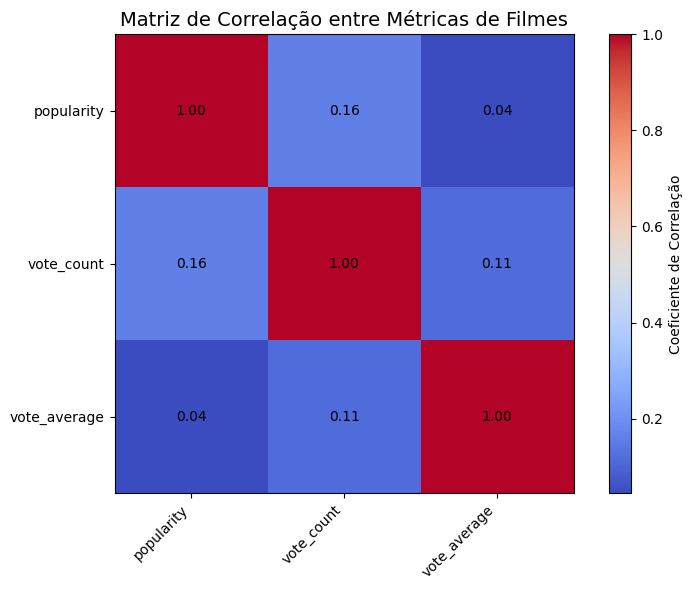

In [ ]:
#Verificando a correlação entre as métricas
#Colunas de interesse
colunas_chave = ['popularity', 'vote_count', 'vote_average']

#Aplicar um filtro para remover filmes sem votos
#Filmes com vote_count = 0 não têm dados relevantes de avaliação e distorcem a correlação.
df_filtrado = terror[terror['vote_count'] > 0]

#Selecionar as colunas e calcular a matriz de correlação (Pearson)
correlation_matrix = df_filtrado[colunas_chave].corr()

#Imprimir a matriz de correlação
print("\nMatriz de Correlação (Pearson) entre Popularidade, Contagem de Votos e Nota Média:")
print(correlation_matrix)

#Gerar o gráfico de mapa de calor (Heatmap)
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de Correlação')

#Configurar rótulos e título
plt.title('Matriz de Correlação entre Métricas de Filmes', fontsize=14)
tick_marks = np.arange(len(colunas_chave))
plt.xticks(tick_marks, colunas_chave, rotation=45, ha='right', fontsize=10)
plt.yticks(tick_marks, colunas_chave, fontsize=10)

#Adicionar os valores da correlação (anotações) no gráfico
for i in range(len(colunas_chave)):
    for j in range(len(colunas_chave)):
        # Formatar o valor com 2 casas decimais
        text = correlation_matrix.iloc[i, j]
        plt.text(j, i, f'{text:.2f}',
                 ha="center", va="center", color="black", fontsize=10)

plt.tight_layout()

#Em resumo, as três métricas estão fracamente correlacionadas entre si.
#Sugerindo que as métricas medem aspectos diferentes do sucesso: alcance/engajamento (popularity, vote_count) e qualidade percebida (vote_average).

####Análise temporal

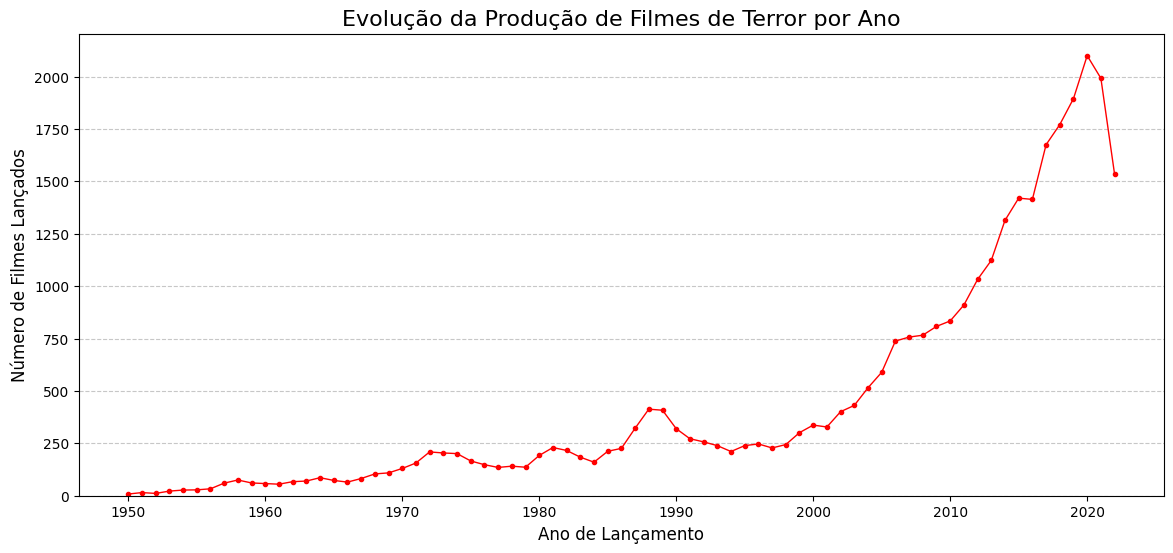

In [ ]:
#Tendência de lançamento

#Remover linhas com datas de lançamento ausentes (NaT)
df_clean = terror.dropna(subset=['release_date'])

#Extrair o ano de lançamento
df_clean['release_year'] = df_clean['release_date'].dt.year

# 4. Contar o número de filmes por ano
yearly_releases = df_clean['release_year'].value_counts().sort_index(ascending=True)

# 5. Plotar a tendência de lançamento
plt.figure(figsize=(14, 6))
yearly_releases.plot(kind='line', marker='o', linestyle='-', color='red', linewidth=1, markersize=3)
plt.title('Evolução da Produção de Filmes de Terror por Ano', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Número de Filmes Lançados', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.savefig('tendencia_lancamento_horror.png')

#Cuidado na interpretação:
#A análise está sujeita a um Vies de Amostra (Sample Bias).
#A conclusão de que a produção de filmes de terror está "explodindo" nos anos recentes pode ser exagerada ou distorcida pela forma como os dados foram coletados.

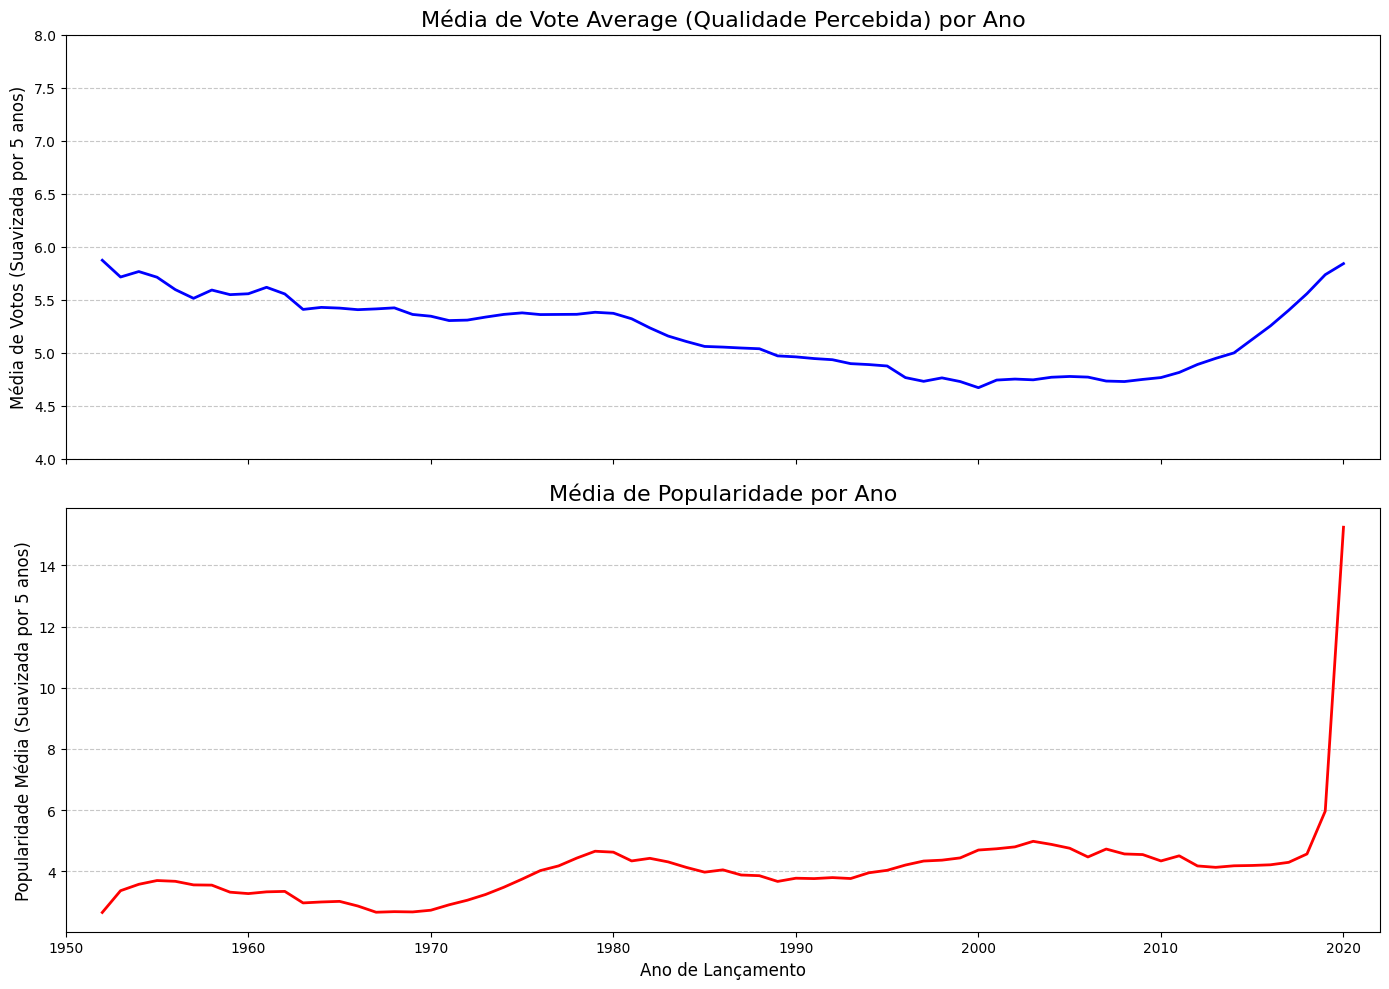

In [ ]:
#Qualidade e popularidade ao longo do tempo

#Filtragem de Relevância
#Remover filmes sem avaliação (vote_count = 0)
df_filtered = df_clean[df_clean['vote_count'] > 0].copy()

#Calcular a Média Anual de Qualidade
yearly_average = df_filtered.groupby('release_year')[['vote_average', 'popularity']].mean()

# 4. Plotar as Tendências

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

#Gráfico 1: Média de Vote Average por Ano
#Suavizador (rolling mean) de 5 anos para visualizar a tendência de longo prazo
yearly_average['vote_average_smooth'] = yearly_average['vote_average'].rolling(window=5, center=True).mean()
yearly_average['vote_average_smooth'].plot(ax=axes[0], kind='line', color='blue', linewidth=2)

axes[0].set_title('Média de Vote Average (Qualidade Percebida) por Ano', fontsize=16)
axes[0].set_ylabel('Média de Votos (Suavizada por 5 anos)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(4.0, 8.0)

#Gráfico 2: Média de Popularidade por Ano
yearly_average['popularity_smooth'] = yearly_average['popularity'].rolling(window=5, center=True).mean()
yearly_average['popularity_smooth'].plot(ax=axes[1], kind='line', color='red', linewidth=2)

axes[1].set_title('Média de Popularidade por Ano', fontsize=16)
axes[1].set_xlabel('Ano de Lançamento', fontsize=12)
axes[1].set_ylabel('Popularidade Média (Suavizada por 5 anos)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlim(1950, yearly_average.index.max())

plt.tight_layout()
plt.savefig('qualidade_e_popularidade_por_ano.png')

Interpretação da análise temporal:

Essa base de dados está sujeita a alguns viéses, pois pode não conter todos os filmes de terror lançados no período. Portanto deve-se ter cuidado ao realizar as avaliações.

---
**Viés de amostra:**

**a. viés de sobrevivência:**

O que é: Filmes antigos que eram menos notáveis, menos populares ou de produção independente podem ter se perdido no tempo, não sendo digitalizados, catalogados ou simplesmente nunca adicionados à base de dados.

O Impacto: O dataset tende a incluir apenas os filmes antigos mais famosos, importantes ou de grandes estúdios (os "sobreviventes"). Isso faz com que a contagem de filmes nos anos 1950, 1960 ou 1970 pareça artificialmente baixa.

Resultado: O gráfico de tendência parece mostrar um crescimento dramático nos últimos 20 anos, mas parte desse crescimento é apenas o aumento na taxa de catalogação de filmes, e não necessariamente na taxa de produção real, especialmente se comparado a filmes antigos de nicho. Os filmes mais antigos catalogados (décadas de 1930 a 1950) tendem a ter as notas médias mais altas: apenas os clássicos aclamados sobreviveram na base de dados, elevando a média de `vote_average` desse período.

**b. viés de cobertura e fonte:**

O que é: Bases de dados como o TMDb (The Movie Database) têm uma cobertura mais completa para filmes produzidos recentemente, especialmente aqueles lançados após a popularização da internet e das plataformas de streaming.

O Impacto: Filmes independentes ou de países não ocidentais tendem a ser menos representados nos anos anteriores a 2010 do que são hoje, quando qualquer produção pode ser catalogada online.

Resultado: O pico de lançamentos recentes é muito mais um reflexo da cobertura exaustiva do que necessariamente um aumento na produção, embora esta provavelmente tenha aumentado.

O gráfico de popularidade (linha vermelha) mostra um crescimento acelerado nos últimos anos. A popularidade média dos filmes de terror é dramaticamente maior nas produções recentes (após 2010) do que em qualquer época anterior.

Implicações: Este aumento reflete a inflação da métrica de popularidade (que é baseada em fatores como visualizações e engajamento online), a maior disponibilidade de filmes e o maior consumo de conteúdo digital. Filmes lançados hoje, mesmo que tenham a mesma qualidade média (`vote_average`) de 30 anos atrás, são exponencialmente mais populares no ecossistema de dados moderno.


####Análise financeira e de duração

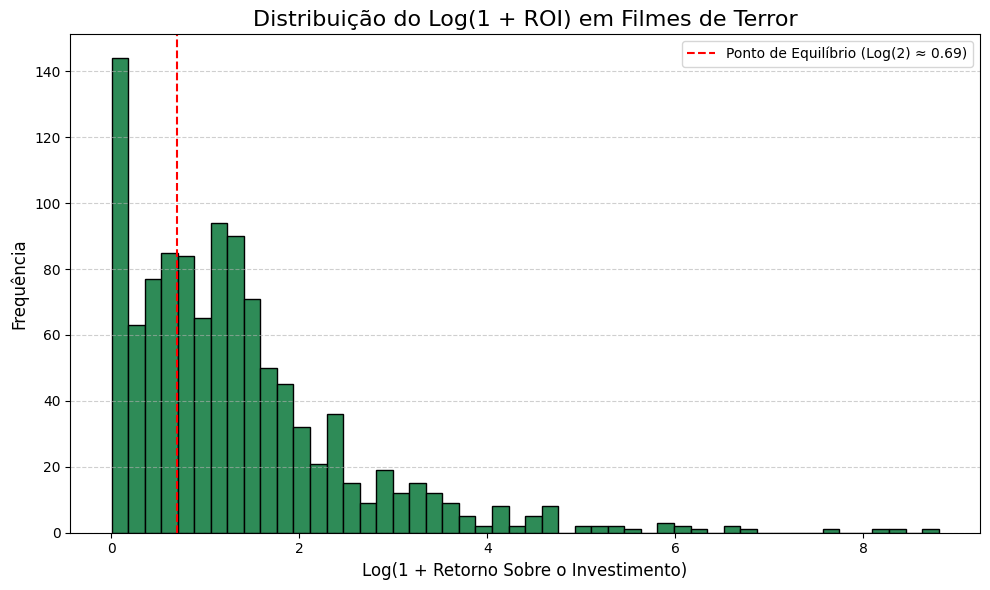

In [ ]:
#Calcular e visualizar a distribuição de Retorno Sobre o Investimento (ROI)

#Colunas financeiras
financial_cols = ['budget', 'revenue']

#Filtrar filmes com dados financeiros válidos
df_financial = terror.dropna(subset=financial_cols).copy()

#Calcular o Retorno Sobre o Investimento (ROI = revenue / budget)
df_financial['ROI'] = df_financial['revenue'] / df_financial['budget']

#Visualizar a Distribuição do ROI Logaritmizado
plt.figure(figsize=(10, 6))

#Usamos np.log1p (log(1 + x)) para lidar com a assimetria extrema do ROI
plt.hist(np.log1p(df_financial['ROI']), bins=50, edgecolor='black', color='seagreen')

plt.title('Distribuição do Log(1 + ROI) em Filmes de Terror', fontsize=16)
plt.xlabel('Log(1 + Retorno Sobre o Investimento)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

#Adicionar a linha do Ponto de Equilíbrio (ROI = 1, que é Log(2))
breakeven_log = np.log1p(1)
plt.axvline(breakeven_log, color='red', linestyle='--', linewidth=1.5, label=f'Ponto de Equilíbrio (Log(2) ≈ {breakeven_log:.2f})')
plt.legend()

plt.tight_layout()
plt.savefig('roi_distribution_histogram.png')

In [ ]:
#Verificar o tamanho da base filtrada
tamanho_base = len(df_financial)

#Calcular a Média e a Mediana do ROI
media_roi = df_financial['ROI'].mean()
mediana_roi = df_financial['ROI'].median()

#Calcular o valor do ponto de equilíbrio (log(2))
#np.log1p(1) calcula log(1 + 1), que é log(2)
log2_value = np.log1p(1)

#Imprimir os resultados
print(f"Tamanho da base após a filtragem (budget > 0 e revenue > 0): {tamanho_base} títulos")
print(f"Média do ROI: {media_roi:.2f}")
print(f"Mediana do ROI: {mediana_roi:.2f}")
print(f"Ponto de Equilíbrio (Log(2)): {log2_value:.2f}")

Tamanho da base após a filtragem (budget > 0 e revenue > 0): 1098 títulos
Média do ROI: 26.10
Mediana do ROI: 2.01
Ponto de Equilíbrio (Log(2)): 0.69


Resultados e Análise

Filtragem de Dados: Dos mais de 32.000 filmes, apenas 1.098 tinham dados válidos e não-zero tanto para `budget` quanto para `revenue`. Esta é uma análise baseada em uma amostra muito menor e mais confiável de filmes com orçamento e receita reportado.

Métricas Chave: Média de ROI: 26.10

Mediana de ROI: 2.01

A grande diferença entre a Média e a Mediana (26.10 vs. 2.01) confirma o que o gráfico mostra: o ROI é extremamente enviesado à direita (positivo), o que significa que alguns filmes tiveram lucros extraordinariamente altos (ROI de centenas ou milhares), puxando a média para cima.

Ponto de Equilíbrio (ROI = 1): A linha vermelha tracejada no $\text{Log}(2) \approx 0.69$ representa o ponto em que o filme paga seu custo.

Geração de Lucro: A massa do histograma está claramente à direita da linha vermelha, indicando que a maioria dos filmes de terror que reportam orçamento e receita gera lucro (ROI > 1).

O gênero de terror é, em geral, um investimento muito lucrativo, o que se deve provavelmente aos custos de produção relativamente baixos (orçamentos menores) em comparação com outros gêneros.


Matriz de Correlação (Pearson) entre Duração, Nota Média e Receita:
               runtime  vote_average   revenue
runtime       1.000000     -0.181995  0.236377
vote_average -0.181995      1.000000  0.162419
revenue       0.236377      0.162419  1.000000


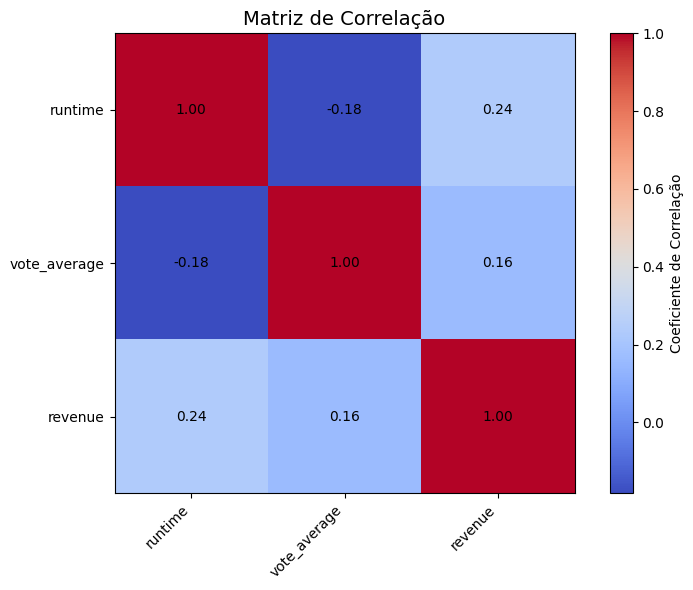

In [ ]:
#Verificar a correlação entre duração do filme (runtime), revenue e vote_average

#Colunas de interesse
colunas_chave = ['runtime', 'vote_average', 'revenue']

#Filtragem de Relevância
#A correlação será calculada em filmes com runtime válido e que tenham votos (vote_count > 0).
df_filtered = terror.dropna(subset=['runtime']).copy()
df_filtered = df_filtered[df_filtered['vote_count'] > 0].copy()
df_corr = df_filtered[colunas_chave]

#Calcular a Matriz de Correlação (Pearson)
correlation_matrix = df_corr.corr()

#Imprimir a matriz de correlação
print("\nMatriz de Correlação (Pearson) entre Duração, Nota Média e Receita:")
print(correlation_matrix)

#Gerar o gráfico de mapa de calor (Heatmap)
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Coeficiente de Correlação')

#Configurar rótulos e título
plt.title('Matriz de Correlação', fontsize=14)
tick_marks = np.arange(len(colunas_chave))
plt.xticks(tick_marks, colunas_chave, rotation=45, ha='right', fontsize=10)
plt.yticks(tick_marks, colunas_chave, fontsize=10)

#Adicionar os valores da correlação (anotações) no gráfico
for i in range(len(colunas_chave)):
    for j in range(len(colunas_chave)):
        # Formatar o valor com 2 casas decimais
        text = correlation_matrix.iloc[i, j]
        plt.text(j, i, f'{text:.2f}',
                 ha="center", va="center", color="black", fontsize=10)

plt.tight_layout()

#As correlações são fracas
#A duração do filme tem uma correlação negativa com a qualidade percebida (sugerindo que "menos é mais" no terror) e uma correlação positiva fraca com a receita.

####Análise de gênero/subgênero

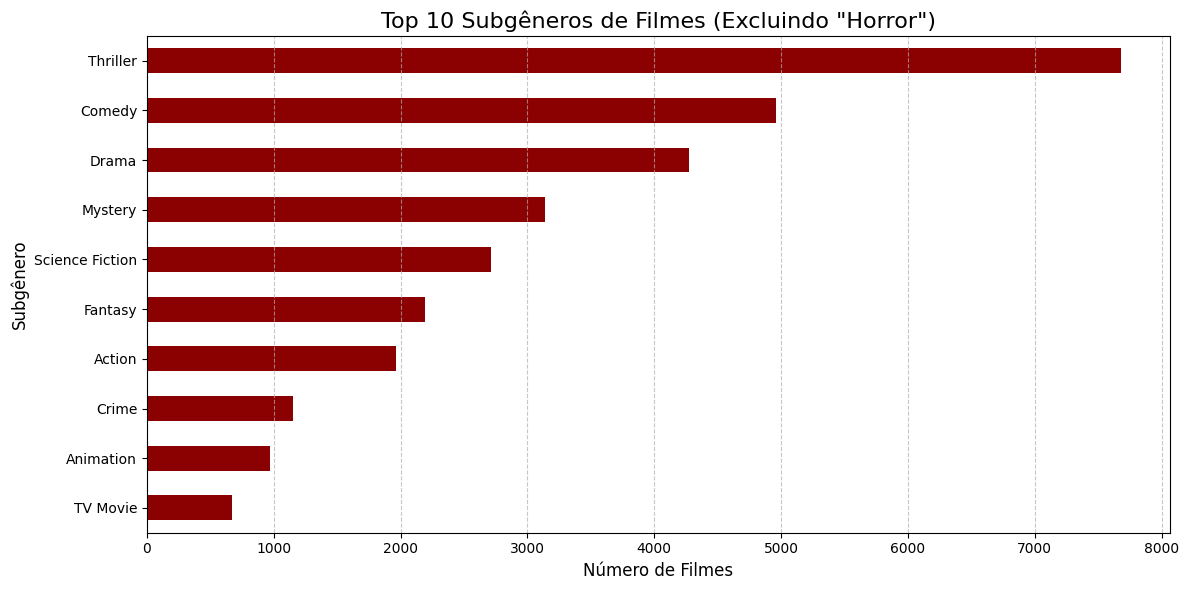

In [ ]:
#Expandir a Coluna 'genre_names'
#Cria uma nova linha para cada subgênero em uma lista, mantendo as outras colunas iguais.
df_exploded = terror.explode('genre_names')

#Contar a Frequência de Cada Subgênero
genre_counts = df_exploded['genre_names'].value_counts()

#Remover o Gênero 'Horror' para focar nos subgêneros complementares
if 'Horror' in genre_counts:
    genre_counts = genre_counts.drop('Horror')

#Selecionar os Top 10 Subgêneros
top_10_subgenres = genre_counts.head(10)

#Visualizar a distribuição em um gráfico de barras
plt.figure(figsize=(12, 6))

#Usar sort_values() para garantir que as barras estejam em ordem crescente no gráfico horizontal
top_10_subgenres.sort_values().plot(kind='barh', color='darkred')

plt.title('Top 10 Subgêneros de Filmes (Excluindo "Horror")', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Subgênero', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('top_10_subgeneros_horror.png')

####Análise linguística

In [ ]:
#Verificando a distribuição por lingua

# Coluna de interesse
coluna_idioma = 'original_language'

#Contar a frequência de cada idioma
language_counts = terror[coluna_idioma].value_counts()

#Calcular a proporção de cada idioma
#normalize=True retorna proporções (0 a 1), multiplicamos por 100 para percentual.
language_proportions = terror[coluna_idioma].value_counts(normalize=True) * 100

#Combinar as contagens e proporções em um DataFrame
language_summary = pd.DataFrame({
    'Contagem': language_counts,
    'Proporção (%)': language_proportions.round(2) # Arredonda para 2 casas decimais
})

#Selecionar os 10 principais idiomas
top_10_languages = language_summary.head(10)

#Imprimir a tabela
print("Top 10 Idiomas Originais na Base de Dados:")
print(top_10_languages)

Top 10 Idiomas Originais na Base de Dados:
                   Contagem  Proporção (%)
original_language                         
en                    21923          67.37
es                     1661            5.1
ja                     1639           5.04
pt                      676           2.08
de                      631           1.94
id                      604           1.86
fr                      591           1.82
it                      575           1.77
zh                      496           1.52
cn                      423            1.3


In [ ]:
#Verificando o ROI por lingua de lançamento
terror['ROI'] = terror['revenue'] / terror['budget']

#Filtragem de Relevância
#Apenas filmes com votos reportados (vote_count > 0)
terror_filtered = terror[terror['vote_count'] > 0].copy()

#Criar a Coluna de Categoria de Idioma
#Categorizar: 'English' ('en') ou 'Other Languages'
terror_filtered['language_category'] = np.where(
    terror_filtered['original_language'] == 'en',
    'English',
    'Other Languages'
)

#Agrupar e Calcular as Métricas Médias
language_performance = terror_filtered.groupby('language_category').agg(
    count=('id', 'size'),
    avg_vote_average=('vote_average', 'mean'),
    avg_roi=('ROI', 'mean')
)

#Imprimir a tabela de desempenho
print("Desempenho Médio (Qualidade e Financeiro) por Categoria de Idioma:")
print(language_performance.round(2))

Desempenho Médio (Qualidade e Financeiro) por Categoria de Idioma:
                   count  avg_vote_average  avg_roi
language_category                                  
English            14736              5.06    15.29
Other Languages     6202              5.47    64.14


Conclusões Chave:

**Aclamação da Crítica (Qualidade):** Filmes de terror em Outros Idiomas (média de 5.47) são, em média, melhor avaliados do que os filmes em Inglês (média de 5.06). Isso pode refletir que os filmes de terror internacionais que chegam às bases de dados costumam ser os mais aclamados ou de nicho, enquanto o grande volume de filmes em inglês inclui muitas produções de baixa qualidade.

**Rentabilidade (ROI):** filmes em Outros Idiomas têm um ROI médio muito superior (64.14) em comparação com os filmes em Inglês (15.29). Este resultado é provavelmente impulsionado por filmes de baixo orçamento de produção internacional que alcançam um sucesso desproporcional à receita.

A base de filmes em inglês, por outro lado, inclui muitos filmes de alto orçamento, o que reduz o ROI médio, mesmo que gerem receita maior.

A base de Outros Idiomas inclui 78 idiomas diferentes, mostrando a diversidade de produções que contribuem para essas métricas superiores.

In [ ]:
#Top idiomas com votos altos

#Definir os limiares de filtro
VOTE_AVERAGE_THRESHOLD = 6.5
VOTE_COUNT_THRESHOLD = 20

#Aplicar o filtro de relevância e qualidade
df_top_rated = terror[
    (terror['vote_average'] > VOTE_AVERAGE_THRESHOLD) &
    (terror['vote_count'] >= VOTE_COUNT_THRESHOLD)
].copy()

#Contar a distribuição dos idiomas originais
language_counts = df_top_rated['original_language'].value_counts()

#Calcular a proporção dos idiomas
total_top_rated = len(df_top_rated)
language_proportions = (language_counts / total_top_rated) * 100

#Combinar e formatar o resumo dos idiomas
language_summary = pd.DataFrame({
    'Contagem': language_counts,
    'Proporção (%)': language_proportions.round(2)
})

#Apresentar os 10 principais idiomas encontrados
top_10_acclaimed_languages = language_summary.head(10)

print(f"Filmes que atendem aos critérios (Vote Average > {VOTE_AVERAGE_THRESHOLD} e Vote Count >= {VOTE_COUNT_THRESHOLD}): {total_top_rated}")
print("\nTop 10 Idiomas em Filmes de Terror Mais Aclamados (Relevantes e com Nota Alta):")
print(top_10_acclaimed_languages)

Filmes que atendem aos critérios (Vote Average > 6.5 e Vote Count >= 20): 856

Top 10 Idiomas em Filmes de Terror Mais Aclamados (Relevantes e com Nota Alta):
                   Contagem  Proporção (%)
original_language                         
en                      504          58.88
ja                       85           9.93
es                       67           7.83
ko                       36           4.21
it                       35           4.09
fr                       25           2.92
de                       15           1.75
zh                        8           0.93
cs                        8           0.93
th                        8           0.93


###NLP

####Análise dos termos mais comuns em filmes de sucesso

In [ ]:
pip install wordcloud

In [ ]:
import re #para expressões regulates
from collections import Counter #para contagem
from itertools import chain, tee
from wordcloud import WordCloud #para nuvem de palavras

In [ ]:
#Filtragem de Sucesso (Top 5% de Vote Average)

#Filtrar filmes com votos para garantir relevância
df_relevant = terror[terror['vote_count'] > 0].copy()
#Filtrar NaN no overview
df_relevant.dropna(subset=['overview'], inplace=True)

#Calcular o 95º percentil do vote_average
vote_avg_95th_percentile = df_relevant['vote_average'].quantile(0.95)

#Aplicar o filtro
df_top_5_percent = df_relevant[
    df_relevant['vote_average'] >= vote_avg_95th_percentile
].copy()

#Combinar todas as sinopses em uma única string
#Para contar a frequência de palavras em todo o conjunto de dados
all_overviews = ' '.join(df_top_5_percent['overview'].tolist())

# --- Processamento de Texto e Contagem de Frequência ---

#Lista de Stopwords em Inglês (adaptada)
#A maioria das sinopses é em Inglês ('en' domina o dataset).
english_stop_words = set([
    "the", "a", "an", "is", "it", "to", "and", "of", "in", "that", "he",
    "she", "his", "her", "on", "with", "as", "by", "from", "at", "for",
    "i", "you", "we", "they", "this", "but", "or", "what", "when", "where",
    "who", "which", "are", "be", "have", "has", "do", "will", "would",
    "can", "could", "about", "up", "out", "only", "no", "not", "so",
    "than", "if", "then", "into", "their", "them", "just", "get", "like",
    "one", "two", "all", "after", "before", "more", "most", "over",
    "under", "new", "old", "back", "away", "find", "must", "us", "him",
    "my", "your", "its", "up", "down", "once", "upon", "man", "woman",
    "young", "story", "film", "movie", "series", "comes", "tells",
    "begins", "world", "while", "make", "take", "time", "when", "life",
    "de", "l", "s", "d", "un", "est", "une", "was", "there"
])

#Limpeza, Tokenização e Contagem
words = re.findall(r'\b\w+\b', all_overviews.lower()) #converte todo o texto para minúsculo

#Filtrar stopwords e palavras de um ou dois caracteres
filtered_words = [
    word for word in words
    if word not in english_stop_words and len(word) > 2
]

#Contar a frequência das palavras
word_counts = Counter(filtered_words)

#Imprimir os Top 20 Termos
top_20_keywords = pd.DataFrame(word_counts.most_common(20), columns=['Termo', 'Frequência'])

print("\nTop 20 Termos Mais Comuns nas Sinopses (Top 5% de Vote Average):")
print(top_20_keywords)


Top 20 Termos Mais Comuns nas Sinopses (Top 5% de Vote Average):
         Termo  Frequência
0       horror         130
1        night         126
2        house          93
3         home          87
4   mysterious          86
5      friends          81
6        short          75
7        group          74
8       family          74
9         evil          72
10        dead          71
11         day          69
12        girl          67
13     strange          66
14        dark          66
15       finds          64
16       death          63
17        town          63
18       being          62
19   something          60


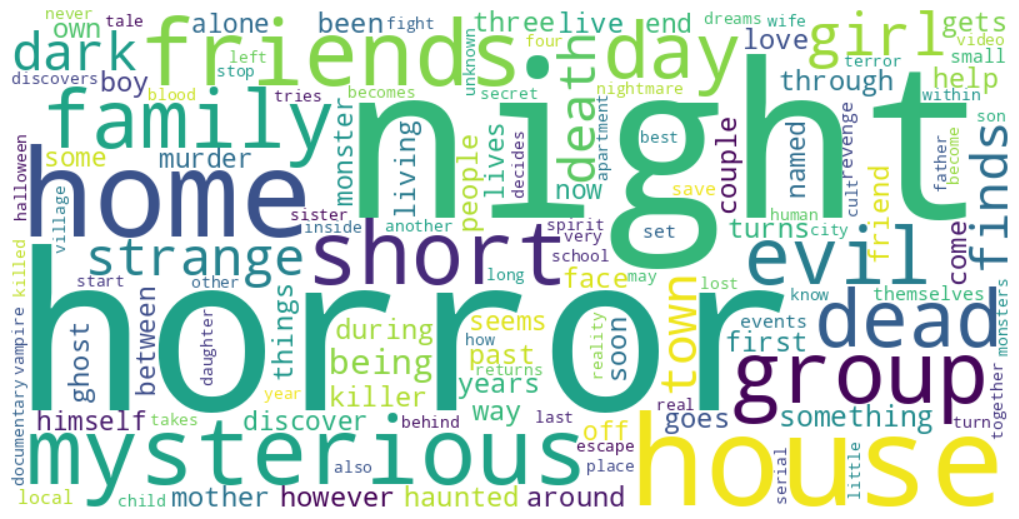

In [ ]:
#Geração da Nuvem de Palavras

# Cria o objeto WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    # Define a lista de stopwords para a biblioteca WordCloud também
    stopwords=english_stop_words,
    min_font_size=10
).generate_from_frequencies(word_counts) # Usa as frequências que calculamos

# Plota a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos
plt.tight_layout(pad=0)

In [ ]:
#Análise por bigrams (n=2)

#Geração de N-grams (Bigrams)

def generate_ngrams(tokens, n=2):
    """Gera uma lista de n-grams a partir de uma lista de tokens."""
    #Cria N iteradores que estão N passos à frente uns dos outros
    iters = tee(tokens, n)
    for i in range(n):
        for j in range(i):
            next(iters[i], None)

    #Zips (combina) os iteradores para formar os n-grams
    return [" ".join(ngram) for ngram in zip(*iters)]

#Gerar Bigrams (N=2)
#Usamos a lista de palavras filtradas para gerar os bigrams
bigrams = generate_ngrams(filtered_words, n=2)

#Contar a frequência dos Bigrams
bigram_counts = Counter(bigrams)

#Imprimir os Top 20 Bigrams
top_20_bigrams = pd.DataFrame(bigram_counts.most_common(20), columns=['Bigram (Termo Composto)', 'Frequência'])

print(f"Limiar de Vote Average (95º Percentil): {vote_avg_95th_percentile:.2f}")
print("\nTop 20 Bigrams (Termos Compostos de Duas Palavras) nas Sinopses Aclamadas:")
print(top_20_bigrams)

Limiar de Vote Average (95º Percentil): 8.00

Top 20 Bigrams (Termos Compostos de Duas Palavras) nas Sinopses Aclamadas:
   Bigram (Termo Composto)  Frequência
0            serial killer          19
1            finds himself          19
2            group friends          12
3           strange things          11
4              living dead          11
5            three friends           9
6               small town           9
7                face face           9
8              best friend           9
9               late night           9
10           haunted house           8
11               years ago           8
12           horror comedy           8
13         halloween night           7
14         turns nightmare           7
15        horror anthology           7
16              falls love           7
17             black magic           7
18       zombie apocalypse           7
19              low budget           7


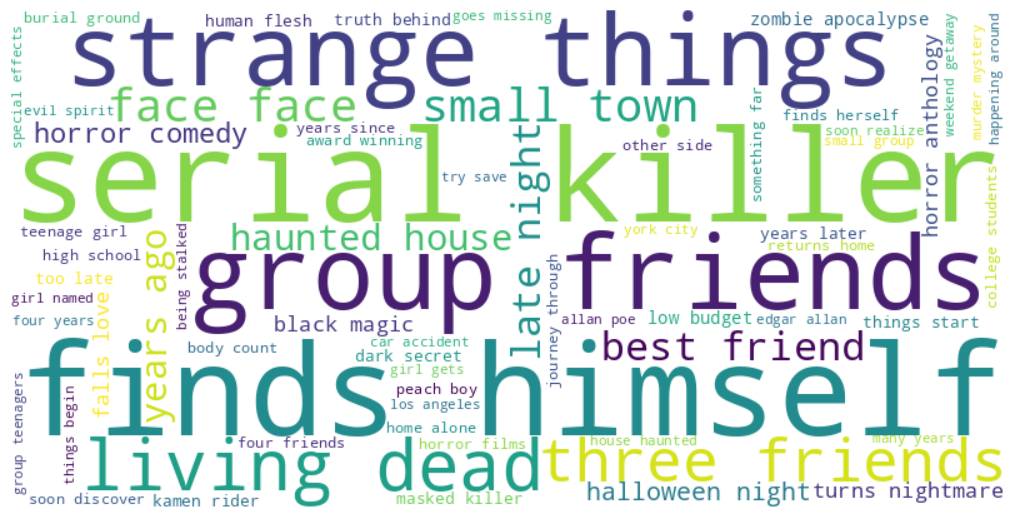

In [ ]:
#Geração da Nuvem de Palavras

# Cria o objeto WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    # Define a lista de stopwords para a biblioteca WordCloud também
    stopwords=english_stop_words,
    min_font_size=10
).generate_from_frequencies(bigram_counts) # Usa as frequências que calculamos

# Plota a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos
plt.tight_layout(pad=0)

####Análise de sentimento

In [ ]:
#A ferramenta VADER do NLTK é usada para análise de sentimento pré-treinada.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [ ]:
#Certifique-se de que o dicionário VADER está baixado
try:
    #A função find() levanta LookupError se o recurso não for encontrado.
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    #Se o recurso não for encontrado, baixamos.
    nltk.download('vader_lexicon', quiet=True)

In [ ]:
#Filtrar NaN no overview, pois é a base da análise de sentimento
df_clean = terror.dropna(subset=['overview']).copy()

In [ ]:
#Inicializar o Analisador de Sentimento
sia = SentimentIntensityAnalyzer()

#Definir a Função de Análise
def get_sentiment_scores(text):
    """Calcula os scores de sentimento VADER para um texto."""
    # Retorna um dicionário com scores 'neg', 'neu', 'pos', 'compound'
    return sia.polarity_scores(text)

#Aplicar a Análise de Sentimento e Extrair Scores
#Aplica a função a cada sinopse e expande o resultado em colunas separadas
sentiment_scores = df_clean['overview'].apply(get_sentiment_scores).apply(pd.Series)

#Concatena os novos scores ao DataFrame
df_sentiment = pd.concat([df_clean.reset_index(drop=True), sentiment_scores], axis=1)

#Filtragem de Relevância
#Apenas filmes com votos reportados (vote_count > 0) para que a correlação seja significativa.
df_final = df_sentiment[df_sentiment['vote_count'] > 0].copy()

#Análise de Correlação
#O 'compound' score é o score de sentimento normalizado mais útil para comparação.
#Metricas: 'compound', 'vote_average', 'vote_count'
correlation_matrix = df_final[['compound', 'vote_average', 'vote_count']].corr()

#Imprimir Resultados
print("Matriz de Correlação entre Sentimento da Sinopse e Desempenho do Filme:")
print(correlation_matrix.round(4))

print("\nInterpretação do Sentimento (Score Composto):")
print(f"Média do Score Composto (Polaridade Geral das Sinopses): {df_final['compound'].mean():.4f}")
print("Score > 0.05: Positivo, Score < -0.05: Negativo, Score entre -0.05 e 0.05: Neutro.")

Matriz de Correlação entre Sentimento da Sinopse e Desempenho do Filme:
              compound  vote_average  vote_count
compound        1.0000        0.0586     -0.0094
vote_average    0.0586        1.0000      0.1130
vote_count     -0.0094        0.1130      1.0000

Interpretação do Sentimento (Score Composto):
Média do Score Composto (Polaridade Geral das Sinopses): -0.3853
Score > 0.05: Positivo, Score < -0.05: Negativo, Score entre -0.05 e 0.05: Neutro.


Média do Score Composto: -0.3853 indica que a polaridade geral das sinopses é **marcadamente negativa**.

Usando a regra de corte (Score < -0.05 é Negativo):

Polaridade: O valor de -0.3853 é significativamente menor do que o limiar de -0.05.

Conclusão: Isso confirma que a linguagem usada para descrever os filmes de terror (nas sinopses) é, em média, fortemente negativa.

Por que esse resultado era esperado. Embora em outros gêneros (como Comédia ou Romance), um score negativo indicaria um problema de comunicação ou um tom pouco atraente, no terror, esse resultado é totalmente esperado e até desejável.

Comunicação de gênero: O objetivo da sinopse de terror é comunicar ameaça, desespero e conflito. Uma sinopse com um score compound positivo ("Uma família feliz faz uma jornada maravilhosa...") falharia em atrair o público-alvo.



Análise das correlações encontradas:

1. Sentimento vs. Qualidade Percebida

Correlação: 0.0586 -> Esta é uma correlação positiva extremamente fraca, quase nula. Não há uma relação estatisticamente significativa entre a polaridade da sinopse e a nota média que o filme recebe. O tom (se é mais negativo/tenebroso ou levemente positivo/de hype) usado para descrever o filme não influencia a percepção de qualidade do público.

2. Sentimento vs. Engajamento

Correlação: -0.0094 -> Esta é uma correlação negativa próxima de zero, quase nula. A polaridade da sinopse não tem relação estatisticamente significativa com o número de votos que o filme recebe. Filmes com sinopses muito negativas não são mais nem menos vistos do que aqueles com sinopses neutras ou positivas.

Resultado geral:

O tom e o sentimento da sinopse `compound score` são maus preditores do desempenho do filme no gênero de terror, tanto para a qualidade `vote_average` quanto para o engajamento `vote_count`.


####Análise de tópicos usando LDA

In [ ]:
!pip install gensim
!pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models as gensim_vis
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords', quiet=True)
import warnings

In [ ]:
# --- CONFIGURAÇÃO ---
NUM_TOPICOS = 3 #Definição do número de tópicos distintos que o modelo vai tentar encontrar
PASSES = 10 #Definição da quantidade de iterações do modelo
# Usando stopwords em inglês
STOP_WORDS = stopwords.words('english')

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Os documentos para a modelagem de tópicos são extraídos da coluna 'overview'
documents = terror['overview'].tolist()

print("1. Pré-processamento e Tokenização dos Documentos:")
print(f"Total de {len(documents)} overviews carregados para processamento.")

1. Pré-processamento e Tokenização dos Documentos:
Total de 32540 overviews carregados para processamento.


In [ ]:
# Função de pré-processamento
def preprocess(text):
    # Verifica se o texto é válido (evita erros se houver NaN ou Non-string)
    if not isinstance(text, str):
        return []

    # Converte para minúsculas
    text = text.lower()
    # Remove pontuação, caracteres especiais e números (Mantenho a regex para caracteres em português para flexibilidade, mas adapto para focar em inglês)
    text = re.sub(r'[^a-z\s]', '', text) # Simplificando a regex para focar em letras e espaços
    # Tokenização (divide a string em palavras)
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in STOP_WORDS]
    # Filtra palavras curtas (opcional)
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

# Aplica a função de pré-processamento a todos os documentos
tokenized_data = [preprocess(doc) for doc in documents]

print("Documentos Tokenizados (Amostra):", tokenized_data[0])

Documentos Tokenizados (Amostra): ['escaping', 'estonian', 'psychiatric', 'facility', 'leena', 'klammer', 'travels', 'america', 'impersonating', 'esther', 'missing', 'daughter', 'wealthy', 'family', 'mask', 'starts', 'slip', 'put', 'mother', 'protect', 'family', 'murderous', 'child', 'cost']


In [ ]:
# Criação do Dicionário e Corpus Gensim
# O dicionário mapeia cada palavra única para um ID
id2word = corpora.Dictionary(tokenized_data)

# O corpus é a representação Bag-of-Words (BoW): lista de tuplas (word_id, word_count)
corpus = [id2word.doc2bow(text) for text in tokenized_data]

print(f"Corpus (Amostra do Doc 1): {corpus[0]}")
print(f"Número de Palavras Únicas (Dicionário): {len(id2word)}")


Corpus (Amostra do Doc 1): [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]
Número de Palavras Únicas (Dicionário): 51711


In [ ]:
# Treinamento do Modelo LDA
print(f"\nTreinando o Modelo LDA com {NUM_TOPICOS} Tópicos...")

# Usamos LdaMulticore para processamento mais rápido
lda_model = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=NUM_TOPICOS,
    random_state=100,
    passes=PASSES,
    workers=2 # Número de cores a serem usados
)


Treinando o Modelo LDA com 3 Tópicos...


In [ ]:
# Exibição dos Tópicos Encontrados
print("\nTópicos Identificados:")
# Imprime as 10 palavras-chave mais importantes para cada tópico
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Tópico {idx+1}: {topic}")


Tópicos Identificados:
Tópico 1: 0.010*"one" + 0.007*"night" + 0.007*"friends" + 0.007*"house" + 0.006*"young" + 0.006*"find" + 0.006*"group" + 0.006*"two" + 0.005*"mysterious" + 0.005*"killer"
Tópico 2: 0.018*"film" + 0.015*"horror" + 0.008*"short" + 0.005*"movie" + 0.005*"world" + 0.005*"story" + 0.003*"series" + 0.003*"video" + 0.003*"zombie" + 0.003*"new"
Tópico 3: 0.009*"man" + 0.009*"young" + 0.009*"woman" + 0.008*"life" + 0.005*"family" + 0.005*"love" + 0.005*"death" + 0.004*"wife" + 0.004*"mother" + 0.004*"girl"


In [ ]:
# Preparação da Visualização Interativa com PyLDAvis
print("\nPreparando a visualização PyLDAvis...")

# Prepara a estrutura de dados necessária para o pyLDAvis
vis_data = gensim_vis.prepare(
    lda_model,
    corpus,
    id2word,
    mds='mmds' # Método para redução de dimensionalidade
)

# Salva a visualização interativa em um arquivo HTML
output_file = 'lda_visualization_horror.html'
pyLDAvis.save_html(vis_data, output_file)


Preparando a visualização PyLDAvis...
